To make subplot cloudy vs clear (DNJ) for a particular level

# Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr

In [2]:
from traj_plot_all_clear_cloudy import traj_plot_all_clear_cloudy

In [3]:
%matplotlib inline

In [4]:
path_traj= '/home/ollie/muali/Data/winter_all/'
path_dates = '/home/ollie/muali/python_notebooks/Avg_dates/3havg_'
dates_cloudy = open(path_dates+'cloudy_dates_only', 'r').read().split('\n')
dates_clear=[]
dates_clear = open(path_dates+'clear_dates_only', 'r').read().split('\n')

In [8]:
# sea ice data
ds_seaice = xr.open_dataset('/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc')
seaice_conc_DJF_mean = ds_seaice.seaice_conc.sel(time=(slice('1997-12-15', '1998-02-15'))).mean('time')

In [11]:
ds_seaice.attrs

OrderedDict([('CDI',
              'Climate Data Interface version 1.6.2 (http://code.zmaw.de/projects/cdi)'),
             ('Conventions', 'CF-1.4'),
             ('nco_openmp_thread_number', 1),
             ('CDO',
              'Climate Data Operators version 1.6.2 (http://code.zmaw.de/projects/cdo)'),
             ('NCO', '4.4.2'),
             ('version', '1.0'),
             ('release_date', 'December_30,_2015'),
             ('history',
              'Updated G10010_SIBT1850.nc; Enforced consistent land mask for all gridcells at all months and years'),
             ('filename', 'G10010_SIBT1850_v1.01i')])

In [17]:
# False in the mask is shown in data
seaice_conc_DJF_mean_masked = np.ma.masked_where(seaice_conc_DJF_mean <=0, seaice_conc_DJF_mean)

In [21]:
seaice_conc_DJF_mean_masked

masked_array(
  data=[[99.59333038330078, 99.59333038330078, 99.59333038330078, ...,
         99.59333038330078, 99.59333038330078, 99.59333038330078],
        [99.59333038330078, 99.59333038330078, 99.59333038330078, ...,
         99.59333038330078, 99.59333038330078, 99.59333038330078],
        [99.59333038330078, 99.59333038330078, 99.59333038330078, ...,
         99.59333038330078, 99.59333038330078, 99.59333038330078],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


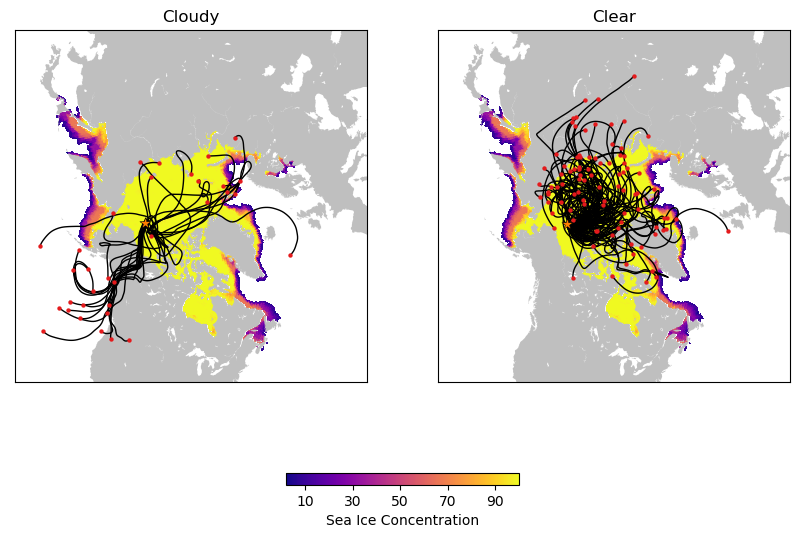

In [56]:
fig, ax = plt.subplots(1,2, figsize=(10,8), dpi=100)
# ax =ax.flatten() when dealing with a lot of subplots

levels=['1400'] # change this to generate for other levels
## cloudy trajectories
# m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l', ax=ax[0])
m = Basemap(projection='npstere',boundinglat=40,lon_0=270, ax=ax[0],
        resolution='l')

m.fillcontinents(color='0.75', ax=ax[0])
#m.drawparallels(np.arange(-80.,81.,20.), color='grey')
#m.drawmeridians(np.arange(-180.,181.,20.))

lons_ice = ds_seaice.longitude.data
lats_ice = ds_seaice.latitude.data

lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
# meshgrid creates a coordinate system with our axis supplied

        
## plotting Sea Ice ##
for axis in ax: 
    ice=m.pcolormesh(lon_ice, lat_ice, seaice_conc_DJF_mean_masked, ax=axis ,latlon=True, cmap='plasma')

# setting color-limit for multiplte color bars, easier way is to directly specify vmin, vmax with contourf

for im in plt.gca().get_images():
    im.set_clim(0, 100)




       
for lvl in levels:
        #to loop over all levels
        # inner loop for plotting all the trajectories on one map

        # read the trajectories to be plotted
    for line_ in dates_cloudy:
            # element by element reading the dates
        df = pd.read_csv(path_traj+'tdump_'+lvl+'_'+line_, skiprows=7, header=None, delim_whitespace=True)
            
        lat = np.array(df.iloc[:, 9].copy())
        lon = np.array(df.iloc[:, 10].copy())
    
                    #Convert lat lon to map coordinates
        x, y = m(lon, lat)
        #source point
        xpt, ypt = m(lon[-1], lat[-1])
        ax[0].scatter(xpt, ypt, marker = 'o', s=10, c='#e41a1c', linewidth=0, zorder=50)
        
   
        #Plot the points on the map
        ax[0].plot(x, y,linewidth=1.0, color='k')
ax[0].set_title('Cloudy')
#SHEBA point
x_s, y_s = m(lon[0], lat[0])
ax[0].scatter(x_s, y_s, marker = '*', c='#ff7f00', s=70, zorder=100, linewidths=0.4, edgecolors='k')
        
## clear trajectories

## cloudy trajectories

m = Basemap(projection='npstere',boundinglat=40,lon_0=270, ax=ax[1],
        resolution='l')
m.fillcontinents(color='0.75', ax=ax[1])
#m.drawparallels(np.arange(-80.,81.,20.), color='grey')
#m.drawmeridians(np.arange(-180.,181.,20.))


       
for lvl in levels:
        #to loop over all levels
        # inner loop for plotting all the trajectories on one map

        # read the trajectories to be plotted
    for line_ in dates_clear:
            # element by element reading the da
        df = pd.read_csv(path_traj+'tdump_'+lvl+'_'+line_, skiprows=7, header=None, delim_whitespace=True)
            
        lat = np.array(df.iloc[:, 9].copy())
        lon = np.array(df.iloc[:, 10].copy())
    
                    #Convert lat lon to map coordinates
        x, y = m(lon, lat)
   
                    #Plot the points on the map
        ax[1].plot(x, y,linewidth=1.0, color='k')
        
        # source point
        xpt, ypt = m(lon[-1], lat[-1])
        
        ax[1].scatter(xpt, ypt, marker = 'o', s=10, c='#e41a1c', linewidth=0, zorder=50)
        
ax[1].set_title('Clear')

#SHEBA point
x_s, y_s = m(lon[0], lat[0])
ax[1].scatter(x_s, y_s, marker = '*', c='#ff7f00', s=70, zorder=100, linewidth=0.4, edgecolors='k');

# colorbar
# fig.subplots_adjust(top=0.95)

plt.colorbar(ice,label='Sea Ice Concentration', ax=ax ,shrink=0.3, orientation='horizontal', ticks=[10,30,50,70,90]);
plt.savefig('/home/ollie/muali/plots_journal_v2/all_cloudy_vs_clear_v01_11_2019.png', dpi=300, bbox_inches='tight')

## Testing

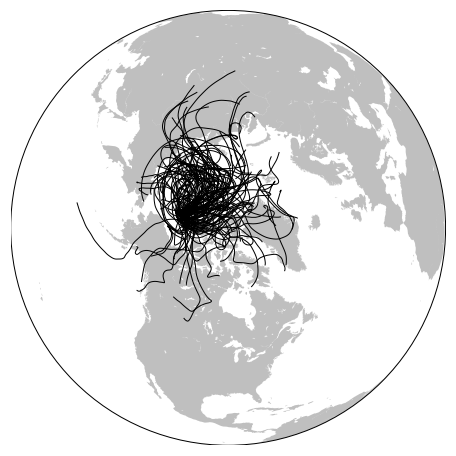

In [69]:
dates_clear = open('/home/ollie/muali/python_notebooks/Avg_dates/3havg_clear_NDJF', 'r').read().split('\n')
fig = plt.figure(figsize=(8,8))

lvl=['1000']
m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l')
m.fillcontinents(color='0.75')
#m.drawparallels(np.arange(-80.,81.,20.), color='grey')
#m.drawmeridians(np.arange(-180.,181.,20.))


       
for lvl in levels:
        #to loop over all levels
        # inner loop for plotting all the trajectories on one map

        # read the trajectories to be plotted
    for line_ in dates_clear:
            # element by element reading the dates
        df = pd.read_csv(path_traj+'tdump_'+lvl+'_'+line_, skiprows=7, header=None, delim_whitespace=True)
            
        lat = np.array(df.iloc[:, 9].copy())
        lon = np.array(df.iloc[:, 10].copy())
    
                    #Convert lat lon to map coordinates
        x, y = m(lon, lat)
   
                    #Plot the points on the map
        plt.plot(x, y,linewidth=1.0, color='k')
        #plt.title('Clear')

In [66]:
dates_clear

['']